In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Toy Dataset

In [52]:
rng = np.random.default_rng(1738)

In [67]:
num_samples = 100
noise_mean = 0
noise_std = 0.25
max_x = 5
min_x = -5

In [68]:
x = rng.uniform(min_x, max_x, num_samples)

In [69]:
f = lambda x: np.sin(x) + .25 * x

noise = rng.normal(noise_mean, noise_std, num_samples)

y = f(x) + noise

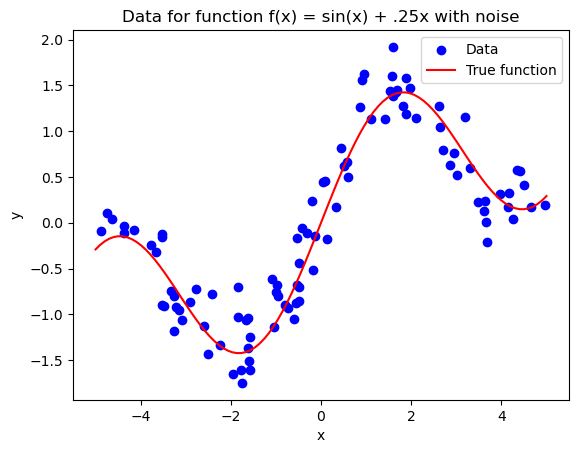

In [70]:
plt.scatter(x, y, color='blue', label='Data')
plt.plot(np.linspace(min_x, max_x, 100), f(np.linspace(min_x, max_x, 100)), 
         color='red', label='True function')
plt.title('Data for function f(x) = sin(x) + .25x with noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Kernel Smoothing Methods